A1: 6
A2: 55
A3: 39
[ 6 55 39]


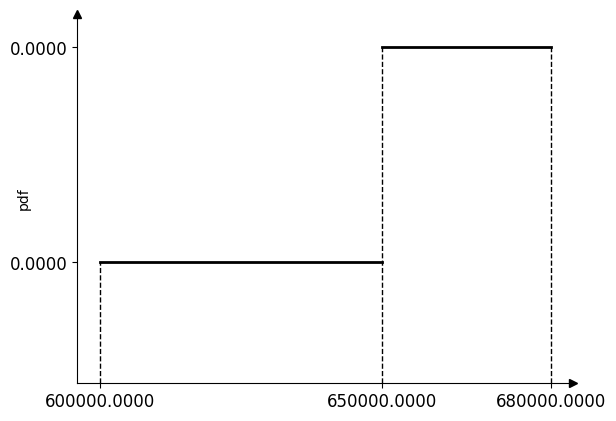

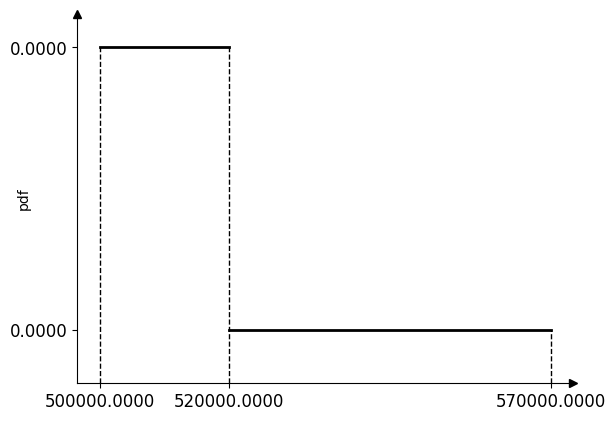

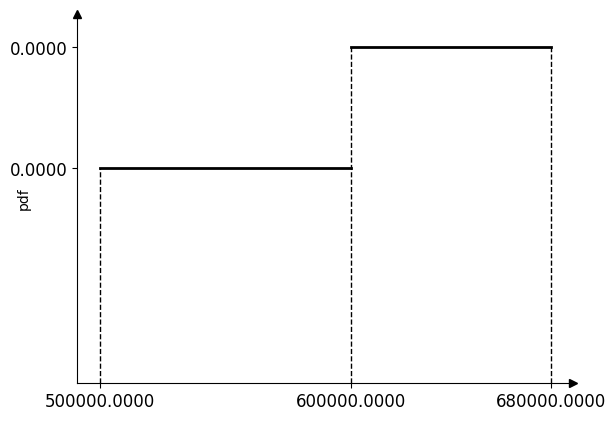

In [ ]:
from asymintervals import AIN 
import numpy as np
from pymcdm.methods import SPOTIS
from pymcdm.helpers import rankdata

price_ain = [
    AIN(600_000, 680_000, 650_000),
    AIN(500_000, 570_000, 520_000),
    AIN(500_000, 680_000, 600_000)
]

rents = np.array([300,700,500])
weights = np.array([0.6, 0.4])
types = np.array([-1,-1])

rnd = np.random.default_rng(0)
rankings = []

for _ in range(100):
    prices = np.array([
        rnd.uniform(x.lower, x.upper) for x in price_ain
    ])

    matrix = np.array([
        [prices[0], rents[0]],
        [prices[1], rents[1]],
        [prices[2], rents[2]]
    ])
    bounds = np.array([
        [np.min(prices), np.max(prices)],
        [np.min(rents), np.max(rents)]
    ])

    body_spotis = SPOTIS(bounds)
    pref_spotis = body_spotis(matrix,weights, types)
    ranking = rankdata(pref_spotis)
    rankings.append(ranking)

rankings = np.array(rankings)

best_counter = [0,0,0]

for ranking in rankings:
    for i, position in enumerate(ranking):
        if position == 1:
            best_counter[i] += 1


print(np.sum(rankings == 1, axis = 0))
for i, ain in enumerate(price_ain):
    ain.plot() 
    plt.show()
